In [421]:
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas as pd 
import math

In [422]:
file = r'./xinlin_data.xls'
df = pd.read_excel(file)

In [472]:
m=[]

In [473]:
prev = "0000"
data = [0] * 1440
for index, row in df.iterrows():
    #print(row['IDsample']==prev)
    #print row
    if ( (row['ID_sample']!=prev) ):
        #print row['IDsample']
        #print(data)
        m.append(data)
        prev = row['ID_sample']
        data = [0] * 1440
    else:
        start = int(row['AC_4_1']*60+row['AC_4_2'])
        end = int(row['AC_4_3']*60+row['AC_4_4'])
        #value = （活动大类-1）*6+（活动小类-1）
        #出行 = 0
        #print ("new one")
        #print (row['ID_sample'])
        #print (start)
        #print (end)
        #print (row['AC_9_1'])
        #print (row['AC_9_2'])
        #print (replacement)
        if (float(row['AC_1_3'])>=1 or float(row['AC_1_3'])<=5):
            if (math.isnan(float(row['AC_9_1']))):
                replacement = 0
            else:
                replacement = (float(row['AC_9_1'])-1)*6+(float(row['AC_9_2']))
        for i in range(start, end):
            data[i] = int(round(replacement, 0))
m.append(data)

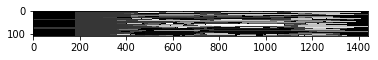

In [474]:
%matplotlib inline
plt.imshow(m, cmap=plt.get_cmap('gray'))

In [475]:
len(m)

107

In [476]:
len(m[0])

1440

In [477]:
string_list = []
for row in m:
    x = ""
    for ele in row:
        if (ele==10):
            x = x + "a"
        if (ele==11):
            x = x + "b"
        if (ele==13):
            x = x +"c"
        if (ele==14):
            x = x + "d"
        if (ele==15):
            x = x + "e"
        if (ele==16):
            x = x + "f"
        if (ele==17):
            x = x + "g"
        if (ele==18):
            x = x + "h"
        if (ele==19):
            x = x + "i"
        if (ele==20):
            x = x + "j"
        if (ele==25):
            x = x + "k"
        if (ele==26):
            x = x + "m"
        if (ele==27):
            x = x + "n"
        if (ele==28):
            x = x + "o"
        if (ele==29):
            x = x + "p"
        if (ele==31):
            x = x + "r"
        if (ele==32):
            x = x + "s"
        if (ele==33):
            x = x + "t"
        if (ele<=10):
            x = x + str(ele)
    string_list.append(x)

In [478]:
from Levenshtein import distance
distance_matrix = []
for i in range(0,107):
    array = []
    for j in range(0,107):
        edit_dist = distance(string_list[i], string_list[j])
        array.append(edit_dist)
    distance_matrix.append(array)

In [447]:
import numpy as np
from math import pi
from sklearn.cluster import DBSCAN
for i in range(1,1440):
    db = DBSCAN(eps=i, min_samples = 1, metric='precomputed')
    db.fit(distance_matrix)
    no_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    if (no_clusters>=2):
        print("hi")
    

In [431]:
print(db)

DBSCAN(algorithm='auto', eps=1439, leaf_size=30, metric='precomputed',
    metric_params=None, min_samples=10, n_jobs=None, p=None)


In [441]:
db = DBSCAN(eps=500, min_samples = 10, metric='precomputed')
db.fit(distance_matrix)

DBSCAN(algorithm='auto', eps=500, leaf_size=30, metric='precomputed',
    metric_params=None, min_samples=10, n_jobs=None, p=None)

In [442]:
labels = db.labels_
no_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print('No of clusters:', no_clusters)
print('Cluster -1 : ', np.nonzero(labels == -1)[0])
print('Cluster 0 : ', np.nonzero(labels == 0)[0])
print('Cluster 1 : ', np.nonzero(labels == 1)[0])
print('Cluster 2 : ', np.nonzero(labels == 2)[0])

('No of clusters:', 1)
('Cluster -1 : ', array([  0,   3,   6,   7,   8,  12,  13,  14,  15,  16,  17,  18,  19,
        20,  28,  29,  30,  33,  34,  35,  36,  37,  38,  39,  43,  44,
        45,  49,  50,  51,  52,  53,  54,  55,  59,  60,  61,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  76,  77,  78,  82,  83,
        84,  88,  89,  90,  91,  93,  94,  95,  97, 100, 103, 104, 105]))
('Cluster 0 : ', array([  1,   2,   4,   5,   9,  10,  11,  21,  22,  23,  24,  25,  26,
        27,  31,  32,  40,  41,  42,  46,  47,  48,  56,  57,  58,  62,
        63,  64,  75,  79,  80,  81,  85,  86,  87,  92,  96,  98,  99,
       101, 102, 106]))
('Cluster 1 : ', array([], dtype=int64))
('Cluster 2 : ', array([], dtype=int64))


In [357]:
array1=[  0,   2,   4,   5,  16,  21,  22,  23,  24,  25,  26,  40,  41,
        42,  47,  48,  57,  58,  62,  64,  81,  85,  87,  94,  95,  97,
        98,  99, 101, 102, 106]

In [358]:
array2=[ 1,  9, 10, 11, 31, 32, 46, 56, 63, 79, 80, 86, 92, 96]

In [359]:
array3=[  3,   6,   7,   8,  12,  13,  14,  15,  17,  18,  19,  20,  27,
        28,  29,  30,  33,  34,  35,  36,  37,  38,  39,  43,  44,  45,
        49,  50,  51,  52,  53,  54,  55,  59,  60,  61,  65,  66,  67,
        68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  82,  83,
        84,  88,  89,  90,  91,  93, 100, 103, 104, 105]

In [360]:
len(array1)

31

In [361]:
len(array2)

14

In [362]:
len(array3)

62

In [363]:
cluster1 = []
for index in array1:
    cluster1.append(m[index])

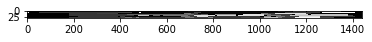

In [364]:
plt.imshow(cluster1, cmap=plt.get_cmap('gray'))

In [365]:
cluster2 = []
for index in array2:
    cluster2.append(m[index])

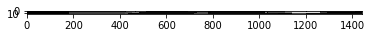

In [366]:
plt.imshow(cluster2, cmap=plt.get_cmap('gray'))

In [367]:
cluster3 = []
for index in array3:
    cluster3.append(m[index])

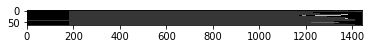

In [368]:
plt.imshow(cluster3, cmap=plt.get_cmap('gray'))

In [384]:
import matplotlib
colormap = matplotlib.cm.get_cmap('Spectral')
rgba = colormap(0.5)
norm = matplotlib.colors.Normalize(vmin=0.0, vmax=33.0)

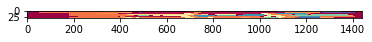

In [414]:
for i in range(0,len(cluster1)):
    for j in range(0,len(cluster1[i])):
        cluster1[i][j]=float(cluster1[i][j])/33
plt.imshow(cluster1, cmap=colormap)

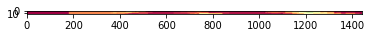

In [413]:
for i in range(0,len(cluster2)):
    for j in range(0,len(cluster2[i])):
        cluster2[i][j]=float(cluster2[i][j])/33
plt.imshow(cluster2, cmap=colormap, interpolation='hamming')

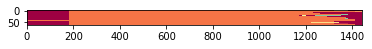

In [406]:
for i in range(0,len(cluster3)):
    for j in range(0,len(cluster3[i])):
        cluster3[i][j]=float(cluster3[i][j])/33
plt.imshow(cluster3, cmap=colormap)

In [479]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(affinity='precomputed', n_clusters=3, linkage='complete').fit(distance_matrix)

In [480]:
print(model.labels_)

[2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 2 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [459]:
len(model.labels_)

107

In [460]:
labels = model.labels_
no_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print('No of clusters:', no_clusters)
print('Cluster 0 : ', np.nonzero(labels == 0)[0])
print('Cluster 1 : ', np.nonzero(labels == 1)[0])
print('Cluster 2 : ', np.nonzero(labels == 2)[0])

('No of clusters:', 3)
('Cluster 0 : ', array([  1,   2,   4,   5,   9,  10,  11,  13,  18,  21,  22,  23,  24,
        25,  26,  27,  31,  32,  33,  34,  36,  40,  41,  42,  46,  47,
        48,  55,  56,  57,  58,  62,  63,  64,  70,  71,  72,  74,  79,
        80,  81,  85,  86,  87,  91,  92,  94,  96,  98,  99, 101, 102,
       106]))
('Cluster 1 : ', array([  0,  16,  17,  20,  61,  69,  93,  97, 100]))
('Cluster 2 : ', array([  3,   6,   7,   8,  12,  14,  15,  19,  28,  29,  30,  35,  37,
        38,  39,  43,  44,  45,  49,  50,  51,  52,  53,  54,  59,  60,
        65,  66,  67,  68,  73,  75,  76,  77,  78,  82,  83,  84,  88,
        89,  90,  95, 103, 104, 105]))


In [485]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(affinity='precomputed', n_clusters=5, linkage='complete').fit(distance_matrix)

In [487]:
labels = model.labels_
no_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print('No of clusters:', no_clusters)
print('Cluster 0 : ', np.nonzero(labels == 0)[0])
print('Cluster 1 : ', np.nonzero(labels == 1)[0])
print('Cluster 2 : ', np.nonzero(labels == 2)[0])
print('Cluster 3 : ', np.nonzero(labels == 3)[0])
print('Cluster 4 : ', np.nonzero(labels == 4)[0])

('No of clusters:', 5)
('Cluster 0 : ', array([ 0, 16, 17, 20, 40, 48, 54, 61, 93]))
('Cluster 1 : ', array([18, 26, 33, 36, 70, 71, 72, 74, 81, 91, 94]))
('Cluster 2 : ', array([  2,   4,   6,   7,   8,  12,  13,  14,  15,  19,  22,  24,  27,
        28,  29,  34,  37,  38,  39,  41,  43,  44,  45,  49,  50,  52,
        53,  55,  57,  58,  60,  62,  64,  65,  66,  68,  69,  73,  75,
        76,  77,  78,  82,  83,  85,  89,  95,  98,  99, 101, 102, 103,
       104, 105, 106]))
('Cluster 3 : ', array([23]))
('Cluster 4 : ', array([  1,   3,   5,   9,  10,  11,  21,  25,  30,  31,  32,  35,  42,
        46,  47,  51,  56,  59,  63,  67,  79,  80,  84,  86,  87,  88,
        90,  92,  96,  97, 100]))


In [463]:
array1 = [  0,  16,  17,  20,  61,  69,  93,  97, 100]
array2 = [  1,   2,   4,   5,   9,  10,  11,  13,  21,  22,  23,  24,  25,
        26,  27,  31,  32,  34,  40,  41,  42,  46,  47,  48,  55,  56,
        57,  58,  62,  63,  64,  70,  79,  80,  81,  85,  86,  87,  92,
        96,  98,  99, 101, 102, 106]
array3 = [  3,   6,   7,   8,  12,  14,  15,  19,  28,  29,  30,  35,  37,
        38,  39,  43,  44,  45,  49,  50,  51,  52,  53,  54,  59,  60,
        65,  66,  67,  68,  73,  75,  76,  77,  78,  82,  83,  84,  88,
        89,  90,  95, 103, 104, 105]
array4 = [18, 33, 36, 71, 72, 74, 91, 94]

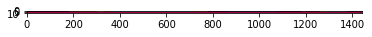

In [468]:
cluster1 = []
for index in array1:
    cluster1.append(m[index])
for i in range(0,len(cluster1)):
    for j in range(0,len(cluster1[i])):
        cluster1[i][j]=float(cluster1[i][j])/33
plt.imshow(cluster1, cmap=colormap)

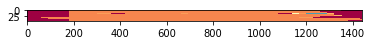

In [469]:
cluster2 = []
for index in array2:
    cluster2.append(m[index])
for i in range(0,len(cluster2)):
    for j in range(0,len(cluster2[i])):
        cluster2[i][j]=float(cluster2[i][j])/33
plt.imshow(cluster2, cmap=colormap)

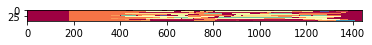

In [470]:
cluster3 = []
for index in array3:
    cluster3.append(m[index])
for i in range(0,len(cluster3)):
    for j in range(0,len(cluster3[i])):
        cluster3[i][j]=float(cluster3[i][j])/33
plt.imshow(cluster3, cmap=colormap)

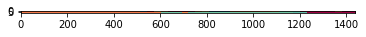

In [471]:
cluster4 = []
for index in array4:
    cluster4.append(m[index])
for i in range(0,len(cluster4)):
    for j in range(0,len(cluster4[i])):
        cluster4[i][j]=float(cluster4[i][j])/33
plt.imshow(cluster4, cmap=colormap)